# Finding the best markets to advertise in an e-Learning product

![marketing](marketing.jpg)

## Introduction
We're working on this project for an an e-learning company that offers courses on programming. Most of their courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc. They want to promote their product and would like to invest some money in advertisement. 

## Goal
Our goal in this project is to find out the two best markets to advertise the product in.

### Approach
To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

### Resources
The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

---

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 20000

## Loading Dataset

In [3]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.txt', low_memory=False)

In [4]:
data.shape

(18175, 136)

In [5]:
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [6]:
data.tail()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,10.0,3ca0354e77ccbdf5d762adab90ffff91,34d08433308c04cd55708ba405d8b519,60000.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,Indonesian,married or domestic partnership,10.0,1.0,d08e67871b,2017-04-03 15:02:42,2017-04-03 15:00:15,2017-04-03 15:06:47,2017-04-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male,NaN,1.0,1.0,1.0,0.0,1.0,0.0,0.0,50000.0,1.0,fc867e53a2adb0b425d2acacaef17faa,6798a2a1aa62ec516ac2ac540883001a,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,IT Specialist,1.0,1.0,1.0,work for a nonprofit,1.0,"DevOps / SysAdmin, Mobile Developer, Pro...",no preference,English,divorced,10000.0,1.0,db213e7dfc,2017-04-01 20:25:23,2017-04-01 20:08:41,2017-04-01 20:38:28,2017-04-01 20:26:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,Na

---

## Dealing with the vast number of features.
Columns need attention. Because of two issues
1. We do not have a proper data dictionary
2. Sheer number of columns

We definitely need to contain the number of columns as it is highly unlikely that all the columns are of use for us.
We have atleast a couple of ways to look into it. 
- Checking for the columns with respect to the contribution of null values in them
- Choosing columns manually by doing some research and intuition 

##### Checking for Null Values 

In [7]:
isnull_cols = {} # Make a Dictionary with nullness of each col as value
for col in data.columns:
    name = col
    nullness = data[col].isnull().sum()/len(data[col])
    isnull_cols[name] = nullness
    
better_cols = [] # to make a nice list of cols
for col in isnull_cols:
    if isnull_cols[col] < 0.3: # Set the acceptable theshold here. For now its 30%
        better_cols.append(col)
        
for col in better_cols:
    print(data[col].value_counts(dropna=False, normalize=True)) # View the value counts of cols in better_cols

NaN     0.154498
24.0    0.054691
26.0    0.051334
25.0    0.050729
23.0    0.049243
22.0    0.046933
27.0    0.046878
21.0    0.046217
20.0    0.040825
28.0    0.040055
29.0    0.035653
30.0    0.034113
19.0    0.032297
32.0    0.026080
18.0    0.025254
31.0    0.025089
33.0    0.023054
34.0    0.019202
35.0    0.018597
17.0    0.017552
36.0    0.014085
37.0    0.013425
16.0    0.012875
38.0    0.010894
40.0    0.010179
39.0    0.009243
15.0    0.009023
42.0    0.008033
41.0    0.007043
43.0    0.006492
45.0    0.006382
44.0    0.006052
14.0    0.005062
47.0    0.004787
46.0    0.004457
50.0    0.004402
48.0    0.003246
49.0    0.003136
13.0    0.002971
53.0    0.001871
12.0    0.001651
55.0    0.001651
52.0    0.001596
54.0    0.001596
58.0    0.001320
57.0    0.001320
59.0    0.001210
51.0    0.001155
56.0    0.001155
60.0    0.000935
61.0    0.000825
62.0    0.000440
11.0    0.000385
63.0    0.000385
70.0    0.000330
69.0    0.000275
0.0     0.000220
71.0    0.000165
10.0    0.0001

1e902b344ad1a25afd6322ba4cac7233    0.000055
2d77f60087dfce9188497b83b8750240    0.000055
bdf0f3ca59a277052872a19cee16ede7    0.000055
d051e5246a47d41a94884b3baacfc6b0    0.000055
8ad16139799d26c4c2ededa5efbd35d8    0.000055
9a503b91517dafd05e3ae66bbca07e41    0.000055
2f09d87f512195e04084160d55cbdda0    0.000055
230e57a0c859197c250bc342ce65873d    0.000055
e89efb935250d57a49d7386930d714ad    0.000055
aa5625fa3b44a668b83b7a96bbe710d3    0.000055
d03dfc7578978517c1adc74f47a42f75    0.000055
2b0bc0440f7038a42966c067b118c64f    0.000055
c27ee109c4de23e7c67f4493d1acc991    0.000055
f8bda1f1657c3bc48fbaa71e2935d0a9    0.000055
8787d4aed73dfbb4bdcab2b6f7c903aa    0.000055
eca4a5b17b5d9ce857cc708415f23636    0.000055
87de0d89dfe9e5205035685410693c46    0.000055
51ab64cd0dea7fc6bb1545b5f6d00c04    0.000055
c72a81f568f083a8877e5e3208bd05d7    0.000055
033fdf9ef3c56f5ae9366229d94a7a74    0.000055
a25fdafbbfb6cab2a84bc23c6b76bb05    0.000055
e562b4c6c7bbab1578f0482d2c872ebc    0.000055
9977d20b21

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
better_cols

['Age',
 'AttendedBootcamp',
 'CityPopulation',
 'CountryCitizen',
 'CountryLive',
 'EmploymentStatus',
 'Gender',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasServedInMilitary',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'IsSoftwareDev',
 'JobPref',
 'LanguageAtHome',
 'MaritalStatus',
 'MoneyForLearning',
 'MonthsProgramming',
 'NetworkID',
 'Part1EndTime',
 'Part1StartTime',
 'Part2EndTime',
 'Part2StartTime',
 'ResourceFCC',
 'SchoolDegree']

##### Choosing columns manually

<font color = 'red'>Change it to look real


    
## Checking for Sample Representativity

As mentioned in the introduction, most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. We can take a participant's work interest as a proxy to imply that the participant is also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [9]:
data['JobRoleInterest'].value_counts(dropna=False, normalize=True)*100

NaN                                                                                                                                                                                                                                                                                                   61.529574
Full-Stack Web Developer                                                                                                                                                                                                                                                                               4.528198
  Front-End Web Developer                                                                                                                                                                                                                                                                              2.475928
  Data Scientist                                                                        

##### Observations:
The output is messy, however we still can see that 
- 61.5% are null values. These might be people have not registered their interest in any Job role.
- By simply skimming the output, it can be seen that a vast number of people are interested in 'Developement' of Web, Mobile, Games, etc.
- There are many people who are interested in more than one Job Role

One thing is for sure, that there are some patterns yet to be discovered and they are worth discovering. To dig deeper into it, lets make a frequency distribution table. Lets also see how many people are interested in more than a single Job role.

In [10]:
job_roles = data['JobRoleInterest'].dropna() # Its important to drop null values for Split to work correctly
job_roles_splitted = job_roles.str.split(',') # Split where there are more than one roles
num_roles = job_roles_splitted.apply(lambda x: len(x))
num_roles.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

- Around 31.65% of the people are interested in one Job Rile

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.
Its not straight forward people have used different formats to give the same answer. To standardise it, we will use some text manipulation using string methods and Regular Expressions

In [11]:
web_or_mobile = job_roles.str.lower().str.contains('(web\sdevelop(er)|(ment)|mobile\sdevelop(er)|(ment))')

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


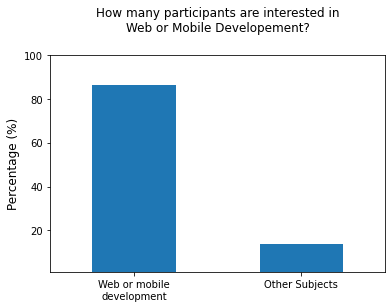

In [12]:
freq_table = web_or_mobile.value_counts(normalize=True)*100
freq_table.plot.bar()
plt.title('How many participants are interested in\nWeb or Mobile Developement?',y = 1.08)
plt.ylabel('Percentage (%)', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other Subjects'],rotation = 0)
plt.ylim([1,100])
plt.show()


- We can see that the predominant majority of the respondents are interested in **Web or Mobile Development (86%)**. This insight makes our sample data representative of the target audience of the e-learning company. Having confirmed that the sample is representative of the whole population, let's start the data analysis.

---

## Where do the new coders live?

To make sure that we are working with a representative sample, lets drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participant

In [13]:
data = data.dropna(subset=['JobRoleInterest']) 
data.shape

(6992, 136)

##### Lets start the analysis with `CountryLive` variable

In [14]:
freq_country = pd.DataFrame(data['CountryLive'].value_counts())
freq_country['Percentage (%)'] = data['CountryLive'].value_counts(normalize=True)*100

In [15]:
freq_country

,CountryLive,Percentage (%)
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


- With over 45% of the respondents, the United States has the largest number of respondents by far, becoming the most interesting country for our further analysis.

- It is followed by India. However India doesn't stand any close to U.S in terms of the number of participants which is less than 8% of the total respondents.

- Then we have United Kingdom and Canada, with around 4.6% and 3.8% respectively.

- In order to choose the right countries, we definitely need to look at aspects other than these self-explanatory figures. As India, U.K. and Canada could be legitimate second markets. This could depend on ease of running an efficient ad campaign, competition within countries, and/or potential spending of customers. 

---

## How much the new coders are willing to pay?

We need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \$59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

* These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
* Our courses are in English, and English is spoken in all these four countries. The more people know English, the better our chances to target the right people with our ads.

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the `MonthsProgramming` column.

In [16]:
# replacing 0 with 1 in 'MonthsProgramming' column
data['MonthsProgramming'] = data['MonthsProgramming'].replace(0,1) 

# A new column to show money spent per month 
data['money_per_month'] = data['MoneyForLearning'] / data['MonthsProgramming']

In [17]:
data['money_per_month'].value_counts(dropna=False)

0.000000        3092
NaN              675
50.000000        128
25.000000        120
16.666667        118
100.000000       118
33.333333        109
8.333333         105
20.000000         88
10.000000         83
83.333333         80
166.666667        67
12.500000         66
4.166667          65
5.000000          62
200.000000        53
500.000000        50
66.666667         47
41.666667         46
250.000000        44
1000.000000       43
3.333333          38
20.833333         37
125.000000        36
6.666667          35
2.500000          33
5.555556          31
150.000000        31
333.333333        31
11.111111         31
30.000000         28
40.000000         27
0.833333          27
1.666667          26
62.500000         24
6.250000          24
55.555556         22
2.777778          22
2.083333          22
416.666667        21
300.000000        21
7.500000          20
75.000000         19
4.000000          19
60.000000         18
666.666667        18
13.888889         18
15.000000    

- We still have some NaNs showing up. Lets make a separate DataFrame that contains only contains columns where `money_per_month` is not null

In [31]:
# omit entire row if 'money_per_month' is null
notnull_money = data[data['money_per_month'].notnull()]

Since we are interested in analysing this with respect to country, lets also remove any rows where `CountryLive` is null and see the frequency of `CountryLive` to gain insight into expenditure trends from each country

In [32]:
notnull_money_country = data[data['CountryLive'].notnull()]
notnull_money_country['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

- Seems like that there is still an ample quantity of data left for the analysis. Lets calculate the mean expenditure of each country

In [33]:
money_countries = data.groupby('CountryLive').mean() 

# Focus the column 'money_per_month'
money_countries['money_per_month']

# As we are interested in four countries, lets focus on them
money_countries['money_per_month'][['United States of America','India', 'United Kingdom','Canada']].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

- The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://www.investopedia.com/terms/p/per-capita-gdp.asp#:~:text=What%20Is%20Per%20Capita%20GDP,a%20country%20by%20its%20population.)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

- It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

It's important to get clarity on these results before we go ahead with our analysis

### Track down of the Outliers (if there are any)


In [34]:
# Isolate the countries of Interest
only_4 = notnull_money_country[notnull_money_country['CountryLive'].str.contains('United\sStates\sof\sAmerica|India|Canada|United\sKingdom')]

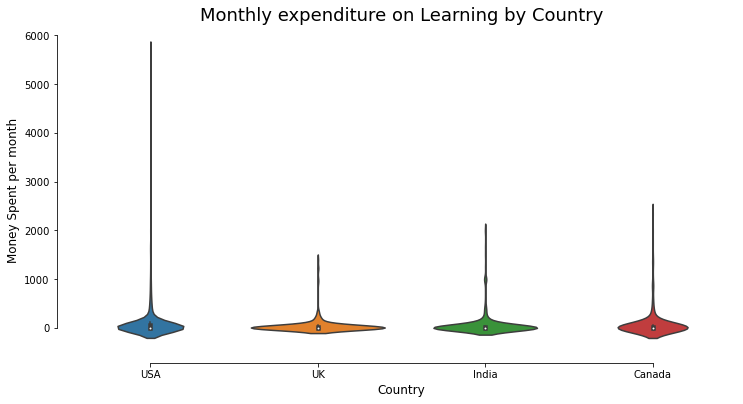

In [62]:
plt.figure(figsize=(12,6))

sns.violinplot(x='CountryLive', y='money_per_month', data=only_4)

# Labels and adjustments
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent per month', fontsize=12)

plt.xticks(range(4),['USA', 'UK', 'India', 'Canada'])
plt.title('Monthly expenditure on Learning by Country', fontsize=18)

# Aethetics
sns.despine(offset=10, trim=True)


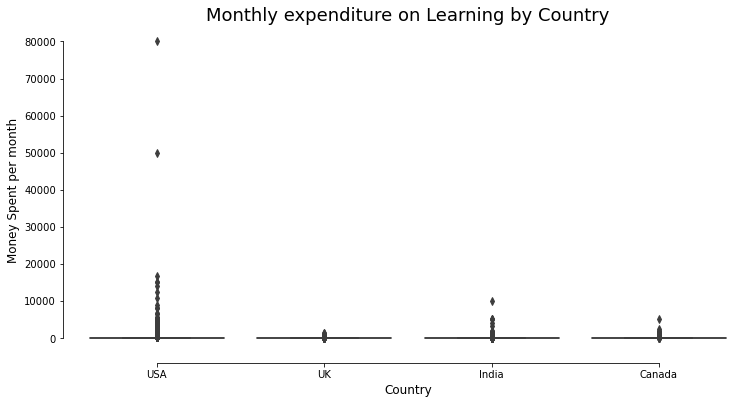

In [35]:
plt.figure(figsize=(12,6))

# Draw a nested boxplot to show the country and monthly expense
sns.boxplot(x='CountryLive', y='money_per_month', data=only_4)

# Labels and adjustments
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent per month', fontsize=12)

plt.xticks(range(4),['USA', 'UK', 'India', 'Canada'])
plt.title('Monthly expenditure on Learning by Country', fontsize=18)

# Aethetics
sns.despine(offset=10, trim=True)



- It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month USD 50,000 or more for learning. 
- We will remove them because they are highly unlikely and, getting rid of these entries will help us zoom into the situation of India and UK as well
    - So lets remove them by denying any entry above USD 20,000

In [36]:
# Filter out any one spending over 20000 per month
notnull_money_country = notnull_money_country[notnull_money_country['money_per_month'] < 20000]

##### Lets repeat the process after having both Outliers removed

In [38]:
money_countries = notnull_money_country.groupby('CountryLive').mean() 

# Focus the column 'money_per_month'
money_countries['money_per_month']

# As we are interested in four countries, lets focus on them
money_countries['money_per_month'][['United States of America','India', 'United Kingdom','Canada']].sort_values(ascending=False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

- As expected, USA's mean monthly expense have come down drastically, letting the table look more balanced

In [40]:
# Lets isolate the countries of interest again
only_4 = notnull_money_country[notnull_money_country['CountryLive'].str.contains('United\sStates\sof\sAmerica|India|Canada|United\sKingdom')]

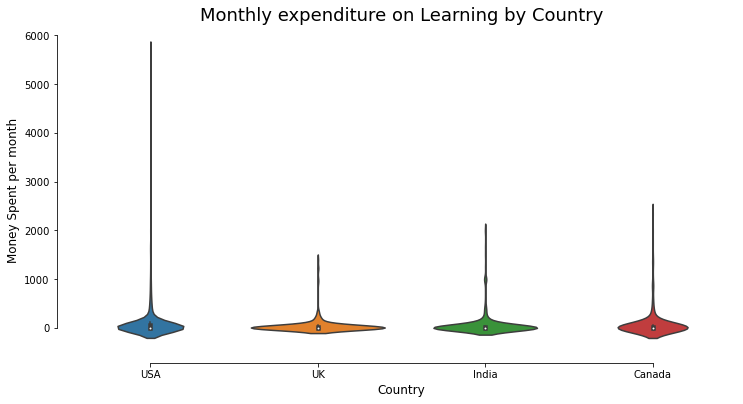

In [63]:
plt.figure(figsize=(12,6))

sns.violinplot(x='CountryLive', y='money_per_month', data=only_4)

# Labels and adjustments
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent per month', fontsize=12)

plt.xticks(range(4),['USA', 'UK', 'India', 'Canada'])
plt.title('Monthly expenditure on Learning by Country', fontsize=18)

# Aethetics
sns.despine(offset=10, trim=True)


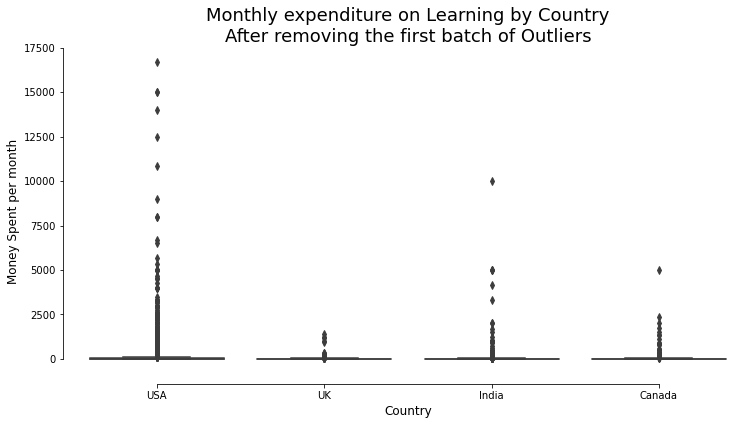

In [43]:
plt.figure(figsize=(12,6))

# Draw a nested boxplot to show the country and monthly expense
sns.boxplot(x='CountryLive', y='money_per_month', data=only_4)

# Labels and adjustments
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent per month', fontsize=12)

plt.xticks(range(4),['USA', 'UK', 'India', 'Canada'])
plt.title('Monthly expenditure on Learning by Country\nAfter removing the first batch of Outliers', fontsize=18)

# Aethetics
sns.despine(offset=10, trim=True)


- By simply looking at the graph, we can see that there are some outliers showing up from India and Canada. Lets check the entries if they justify this relatively so high spending on learning
- Lets also check the USA's scene as numerous outliers have sprouted from there

Check for Outliers in India. Lets assume anyone an outlier who is spending over USD 2,500 from India

In [48]:
# Get into the profiles of these outliers from India
india_outliers = only_4[(only_4['CountryLive'] == 'India') & (only_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

- No participant from India attended any bootcamp. The respondents might have misinterpreted this question as fee along with university tuition. As the question was *" Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)? "*. Thus, these rows can be removed. 

In [49]:
# Removal of the row using its row label
only_4 = only_4.drop(india_outliers.index)

Check for Outliers in Canada. Lets assume anyone an outlier who is spending over USD 4,500 from Canada

In [50]:
# Get into the profiles of outliers from Canada
canada_outliers = only_4[(only_4['CountryLive'] == 'Canada') & (only_4['money_per_month'] >= 2500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


- This participant had been programming for hardly two months when he completed the survey and seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We will remove this entry as well

In [51]:
# Removal of the row using its row label
only_4 = only_4.drop(canada_outliers.index)

Further check for Outliers in USA. Lets assume anyone an outlier who is spending over USD 6,000 from USA

In [52]:
# Lets further get into the profiles of outliers from USA 
usa_outliers = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['money_per_month'] >= 6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- For the United States out of 11 outliers, 6 people attended bootcamps. We'll remove those rows where participants spent 6000 dollars a month  and didn't attend bootcamp. We'll also remove respondents that didn't attend bootcamps and have been programming for 3 months or less. Moreover, some of these people have debts and financial dependents, so their spending large amounts of money per month make these values look candidates to be dropped. 


In [53]:
# Removal of the row using its row label
only_4 = only_4.drop(usa_outliers.index)

##### After removing quite a many Outliers from these countries, lets see what impact has it brought to the mean and distribution

In [55]:
# Recomputation of mean of money spent by students each month
only_4.groupby('CountryLive').mean()['money_per_month'].sort_values(ascending=False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: money_per_month, dtype: float64

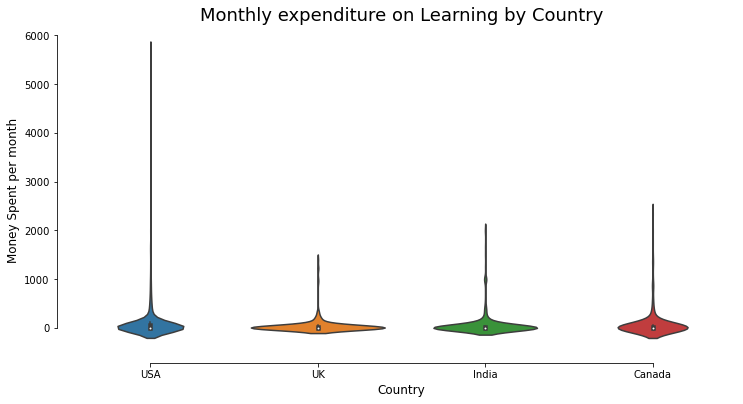

In [64]:
plt.figure(figsize=(12,6))

sns.violinplot(x='CountryLive', y='money_per_month', data=only_4)

# Labels and adjustments
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent per month', fontsize=12)

plt.xticks(range(4),['USA', 'UK', 'India', 'Canada'])
plt.title('Monthly expenditure on Learning by Country', fontsize=18)

# Aethetics
sns.despine(offset=10, trim=True)


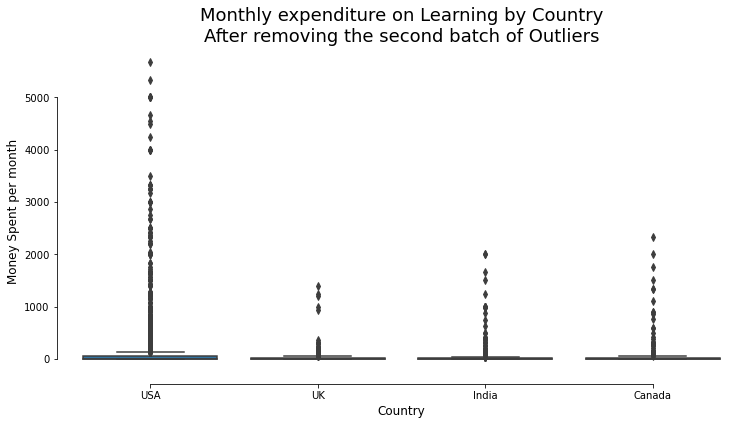

In [56]:
plt.figure(figsize=(12,6))

# Draw a nested boxplot to show the country and monthly expense
sns.boxplot(x='CountryLive', y='money_per_month', data=only_4)

# Labels and adjustments
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent per month', fontsize=12)

plt.xticks(range(4),['USA', 'UK', 'India', 'Canada'])
plt.title('Monthly expenditure on Learning by Country\nAfter removing the second batch of Outliers', fontsize=18)

# Aethetics
sns.despine(offset=10, trim=True)

### So far, 
- The United States remains as the best option to advertise as the coders are willing to pay 143 dollars a month.
- Canada remains the second best option as the people are willing to pay 93 dollars a month.
- India and the United Kingdom remain as the third and fourth best options with 66 dollars and 45 dollars respectively.

In [58]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

## Conclusions 

One country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly USD 143).

We sell subscriptions at a price of USD 59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly USD 93 per month, compared to India (USD 66) and the United Kingdom (USD 45).

Let's take a second look at India before deciding to choose Canada as our second best choice:

- USD 59 doesn't seem like an expensive sum for people in India since they spend on average USD 66 each month.
- We have almost twice as more potential customers in India than we have in Canada:


So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada as people there are willing to pay much more than people in India, there are good chances that India might actually be a better choice because of the large number of potential customers. 

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.